In [1]:
import sage.combinat.permutation as permutation

def BBS_move(old_state):
    # takes a list containing the integers 1-n (as well as an
    # unspecified # of zeroes) and preforms a "Fukuda" BBS move on it

    state = []
    for elt in old_state:
        state.append(elt)
        
    # naive method of preforming a move, runs in cubic? time
    # still fast enough for relatively small permuations 
    n = max(state)
    for i in range(1,n+1):
        # checks the location of each integer 1-n
        j = state.index(i)
        # if there is a zero to the right of i, preform a swap
        if 0 in state[j+1:]:
            k = state[j+1:].index(0)
            state[j], state[k+j+1] = state[k+j+1], state[j]
        # otherwise, stick i on the end of the list and put a zero where i was
        else:
            state.append(i)
            state[j] = 0
    
    return state

def BBS(arrangement, t):
    if t >= 0:
        system = [arrangement]
        for move in range(t):
            step = BBS_move(system[move])
            system.append(step)
        # THIS IS DIFFERENT FROM WHAT BBS FUNCTION RETURNS IN bbs_system.py
        # RETURNS ALL CONFIGS FOR times 0,1,...,t
        return system

def SolitonDecomp(config):
    # takes an arrangement of balls (as a list) and returns its SolitonDecomp as a Tableau
    # CONTINGENT on BBS always being sorted after n moves
    # it shouldn't be too hard to insert logic that checks to make sure we've reached when we reach a steady state
    # just feels like too much work right now
    # besides, it seems quite likely that in fact bbs IS always sorted after n moves
    
    # find the BBS configuration at t = n
    n = max(config)
    final = BBS(config, n)[n - 1]
    
    # create a list of lists sc that will store the soliton content
    sc = [[]]
    # sol_num tracks which soliton we're on (from left to right)
    sol_num = 0
    l = len(final)
    for i in range(l):
        if final[i] != 0:
            # put the current value on the end of the current soliton
            sc[sol_num].append(final[i])
            if i < l - 1:
                if final[i] >= final[i + 1]:
                    # if the next entry is smaller than current one, make a new soliton
                    sol_num = sol_num + 1
                    sc.append([])
    # sc has the solitons in the reverse order, so we have to reverse it
    return Tableau(sc[::-1])

def ss_times(n):
    # takes an integer n and returns a dictionary with keys for each 
    # permutation in Sn and values equal to number of BBS moves it takes to reach a steady state
    
    stopping_times = {}
    for sigma in SymmetricGroup(n):
        p = Permutation(sigma)
        perm = list(p)
        sd = SolitonDecomp(perm)

        # grabs the reading word of SolitonDecomp
        sd_list = []
        for l in sd[::-1]:
            for num in l:
                sd_list.append(num)

        # configs is a list containing the configuration of our permutation after t BBS moves at index t
        configs = BBS(perm, n)

        # check each time t=0,1,...,n to see if the configuration is in the steady state order
        # the first such time is the stopping time, so we store it in the dictionary and move onto the next perm
        for t in range(n + 1):
            cur = []
            for elt in configs[t]:
                if elt != 0:
                    cur.append(elt)
            if sd_list == cur:
                stopping_times[p] = t
                break
        
    return stopping_times


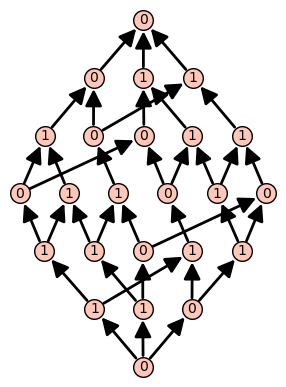

In [49]:
# computed up to n=9 so far:
# 0,0,1,1,2,3,4,5,6
# OEIS has all sorts of stuff that fits this
#for n in range(1,8):
    #print('the greatest stopping time for n =', n, 'is', max(list(ss_times(n).values())))

n = 4
Sn = posets.SymmetricGroupWeakOrderPoset(n)
ss = ss_times(n)
sss = {}

# formats each perm in the dictionary into a string and makes a new dict
for pair in ss.items():
    p = pair[0]
    w = ''
    for elt in p:
        w = w + str(elt)
    sss[w] = pair[1]

# plots a Hasse diagram where each permutation is labeled by its steady state time
Sn.plot(element_labels=sss)